<img src="https://raw.githubusercontent.com/sebastianVP/sebastianVP/main/toulouselautrec_logo.jpg" alt= "LOGO CAT" width=400 height=400 align = "right">

<br>
<h1><font color="#7F000E" size=5>TOULOUSE LAUTREC </font></h1>
<h1><font color="#7F000R" size=6> DATA SCIENCE MACHINE LEARNING</font></h1>
<h1><font color="#7F000E" size=4> ANALISIS DE DATOS CON PYTHON
 </font></h1>
<br>
<br>
<div style="text-align:left">
<font color="#7F000E" size=3> Ing. Alexander Valdez</font><br>
<font color="#7F000E" size=3> Curso 2271, Clases Lunes y Miercoles 20:00-22:30pm </font><br>
<font color="#7F000e" size=3> Quinta Sesión - 1</font><br>
</div>

## **Ejemplo de regresion lineal.**

El primer paso es conseguir un dataset o conjunto de datos, para esto podemos recurrir al sitio Kaggle.com, el cual entre otras cosas ofrece datasets abiertos.

En este caso usaremos el dataset kc_house_data (https://www.kaggle.com/datasets/shivachandel/kc-house-data) ,el cual contiene datos de distintas casas en Washington, EEUU.

Puedes descargar el conjunto de datos desde este enlace:
https://drive.google.com/file/d/1sIwmhhn50utRZY556ENMAa13sIxWSzHj/view?usp=sharing

Una vez lo tengas descargado es importante que sepas donde lo dejaste guardado.



In [ ]:
import pandas as pd
# Este codigo permite importar la libreria pandas, la cual sera util para manejar los datos
#"as pd" singifica que para usar funciones de pandas debemos escribir pd.nombre_de_funcion

#from google.colab import files #estas dos lineas de codigo permiten subir el archivo vsc a Google Colab clickeando "examinar"
#uploaded = files.upload()


import io # No preocuparse por esta linea, lo importante es que nos permite leer vsc que subimos
#df = pd.read_csv(io.BytesIO(uploaded['data.csv']))# esta linea se encagarga de contener df en el dataframe
df = pd.read_csv("/content/kc_house_data.csv")
# |
# |
# | Deberia aparecer un boton de "Examinar..." para subir el archivo con el dataset una vez ejecutes esta celda
# |
# ↓

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


Antes de hacer cualquier otra cosa es importante examinar y entender el dataset, por eso se utilizaran algunas funciones de ejemplo. Como describe, head, shape y dtypes



In [ ]:
df.describe() # la funcion describe nos muestra un buen resumen del dataset

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.head() # la funcion head nos muestra los primeros 5 elementos del dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape # la funcion shape nos da la forma del dataset en este formato (Cantidad de filas, cantidad de columnas)

#Las cantidad de filas representa la cantidad de casas del dataset
#La cantidad de columnas representa la cantidad de atributos o datos que tiene cada casa del dataset

(21613, 21)

In [ ]:
df.dtypes # la funcion dtypes nos muestra los tipos de variables del dataset, podemos ver que la mayoria son numeros enteros

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.drop(['date'],axis =1,inplace=True)

In [ ]:
correlations = df.corr()['price']

# la funcion corr nos permite obtener las correlaciones entre las distintas variables
# En este caso selecionamos del dataframe la variable "price" (precio), por lo cual
# obtendremos las relaciones entre esta variable y las demas
# Entre mas cercano a 1 sea el valor mayor es la correlacion y mejor es la variable para predecir "price"

print(correlations) # imprimimos los valores

#sqft_living (pies cuadrados de la vivienda) deberia dar el valor de mayor correlacion con el precio de la casa


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


Al igual que con el R2, entre más cercano a 1 sea el valor de correlación mejor.

Al usar la función shape la consola debería haber mostrado que el dataset contiene 21613, lo cual puede ser una cantidad incomoda para visualizar en gráficas como haremos más adelante. Por este motivo en el siguiente bloque de codigo vamos a "achicar el dataset", dejando solo 15 casas para analizar. Más adelante usaremos todo el dataset y podremos comparar resultados.

In [ ]:
df_min = df.sample(15, random_state=10) #creamos un nuevo dataset al cual copiamos 15 valores del dataset original
# random_state=10 es un valor que deberias mantener igual si quieres obtener las mismas graficas, es basicamente la forma de asegurarse de que los 15 datos que seleccionamos sean los mismos
# si pongo otro valor como random state el conjunto de 15 datos seria diferente


# linea de codigo que me permite utilizar la clase Linear Regression
from sklearn.linear_model import LinearRegression # Sklearn es la libreria de machine leaarning que estaremos usando, por ahora solo usaremos su funcion de Regresion lineal





X = df_min['sqft_living'].values.reshape(-1,1) # Definimos como X los valores de la columna que contiene el área de la vivienda en pies cuadrados
# ".values.reshape(-1,1)" es necesario para luego utilizar la funcion fit, es sencillamente algo relacionado a ajustar el formato del Array no te preocupes ahora por entender del todo su funcionamiento

y = df_min['price'].values.reshape(-1,1)  # Definimos como Y la columna que contiene los precios de las viviendas




Text(0.5, 0, 'Superficie en pies cuadrados')

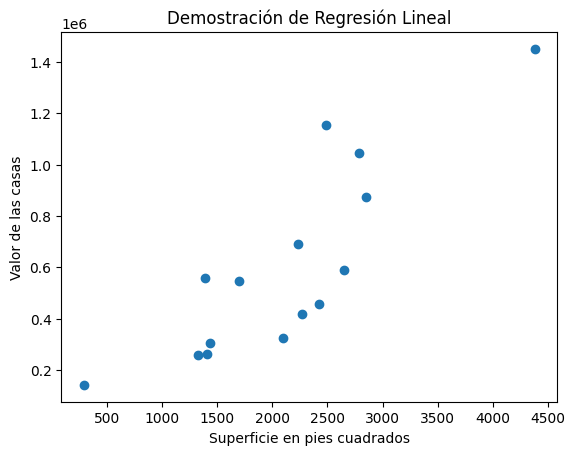

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar


# Ahora que tenemos un conjunto de datos mas pequeño deberia ser facil graficarlo

plt.scatter(X,y) # Genera una grafica de puntos

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

In [ ]:
reg = LinearRegression().fit(X,y)
# La funcion fit relaciona los valores de X e y, mientras que Linear Regression calcula la recta
# la recta (y = mx + b) obtenida se guarda en la variable reg

Matematicamente, los valores obtenidos a través de la recta se representan matemáticamente así: *ŷ*, para diferenciarlo de la *y* común, la cual en este caso contiene los valores de precios. Como a *ŷ* se le suele decir "y con sombrero" (en inglés "hat" es "sombrero") llamaremos a la variable que contiene los valores predecidos y_hat, lo cual seria como llamarla y_con_sombrero

In [ ]:
y_hat = reg.predict(X) # Sustituimos en la recta (y = mx + b) nuestros valores iniciales de X
print(y_hat) # guardamos los resultados en y_hat

[[ 599907.47572331]
 [ 643987.57285175]
 [ -13823.1073727 ]
 [ 359162.32986797]
 [ 464276.4076358 ]
 [ 338817.66965484]
 [ 657550.67966051]
 [ 372725.43667672]
 [ 365943.88327235]
 [ 732147.76710864]
 [ 786400.19434365]
 [ 708412.33019332]
 [1373004.56382215]
 [ 854215.7283874 ]
 [ 833871.06817428]]


Text(0.5, 0, 'Superficie en pies cuadrados')

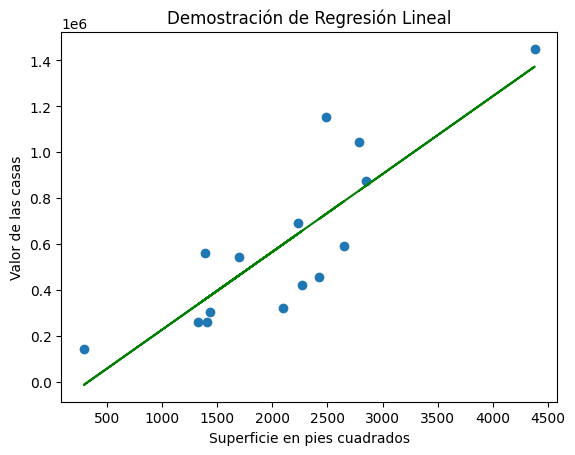

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y) # mostrar la dispersion original de las 15 muestras entre price y sqft_living
plt.plot(X, y_hat, color='green') # el resultado de la prediccion del modelo con los datos de 15 muestas

plt.title('Demostración de Regresión Lineal') # Agrego un titulo
plt.ylabel('Valor de las casas') # defino un nombre del eje y
plt.xlabel('Superficie en pies cuadrados') # defino un nombre del eje x

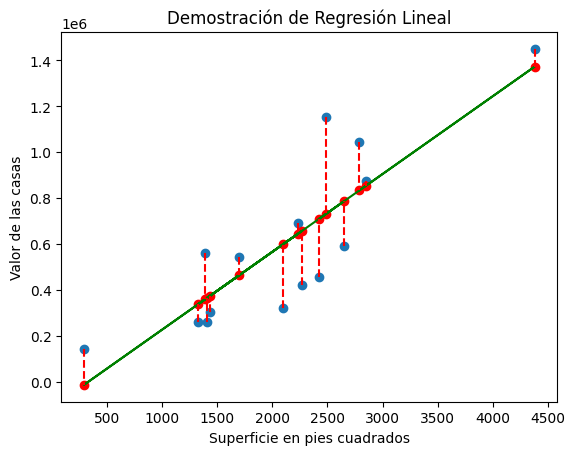

In [ ]:
import matplotlib.pyplot as plt # Esta libreria tiene herramientas para graficar

# Recreamos la misma grafica pero ahora se muestra la recta obtenida

plt.scatter(X,y) # Grafica de dispersion, muestra los puntos iniciales

plt.scatter(X,y_hat, color='red')

# grafica de dispersion, muestra los puntos que se obtienen al sustituir nuestros valores iniciales de X en la ecuacion y = mx + b obtenida mediante regresion

plt.plot(X, y_hat, color='green') # Dibuja la linea de regresion


plt.title('Demostración de Regresión Lineal') # asigna titulo a la grafica
plt.ylabel('Valor de las casas') # asigna nombre al eje y de la grafica
plt.xlabel('Superficie en pies cuadrados') # asigna nombre al eje x de la grafica

# No preocuparse demasiado por esta parte, al igual que las otras graficas no es necesaria
# pero ayuda a visualizar que esta pasando

# Esto es un loop, el cual recorre todos los valores de los conjuntos X, y, y_hat
# a medida que los recorre va dibujando lineas punteadas para ilustrar el error de la regresion
for i in range(0, len(X)):
  point1 = [X[i], y[i]]
  point2 = [X[i], y_hat[i]]

  x_values = [point1[0], point2[0]]
  y_values = [point1[1], point2[1]]

  plt.plot(x_values, y_values, color='red', linestyle='dashed')



En este momento en la variable y tenemos los valores de precios originales, mientras que en y_hat tenemos los valores de precios obtenidos mediante la regresión lineal. Si comparamos la diferencia entre estos valores podemos obtener el R2 de la recta.


In [ ]:
from sklearn.metrics import r2_score
r2_score(y, y_hat)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.71610957246548

Al momento de escribir este texto el R2 obtenido es de 0.71610957246548, o sea, un gran modelo. :)
Pero es momento de recordar que de los miles de datos del dataset utilizamos solo 15. ¿Qué sucede si los usamos todos?

In [ ]:
# Defino nuevos valores de X e y pero con un 1 al final para no repetir nombres de variables

X1 = df['sqft_living'].values.reshape(-1,1)
y1 = df['price']

In [ ]:
X1.shape

(21613, 1)

In [ ]:
y1.shape

(21613,)

Text(0.5, 0, 'Superficie en pies cuadrados')

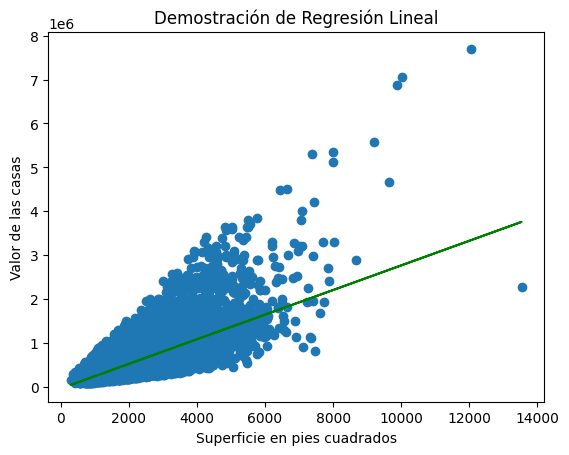

In [ ]:
# vuelvo a usar las herramientas de regresion

reg = LinearRegression().fit(X1,y1)
y_hat1 = reg.predict(X1)

# Y grafico nuevamente
plt.scatter(X1,y1)
plt.plot(X1, y_hat1, color='green')
plt.title('Demostración de Regresión Lineal')
plt.ylabel('Valor de las casas')
plt.xlabel('Superficie en pies cuadrados')

Ahora que tengo todos los datos la recta ya no parece tan representativa, ¿No?

Veamos su valor de R2

In [ ]:
r2_score(y1, y_hat1)
# |
# |
# | Deberia aparecer el r2 una vez ejecutes este codigo
# |
# ↓

0.4928532179037931

El valor de R2 obtenido deberia ser de 0.4928532179037931, un valor mucho menor y no muy útil. ¿Por qué sucede esto?
La respuesta es bastante sencilla, con el primer conjunto de datos tuvimos "suerte" de que los pocos valores caian cerca de la recta. Pero al utilizar todos los datos del dataset se mostró que una recta que considera solo dos variables no es suficiente para predecir de forma adecuada el valor de las casas, resulta que hay muchos otros factores que afectan.

Al imprimir nuevamente las correlaciones podemos ver que hay otras variables que tienen una alta relación con la variable de precio, "bathrooms " tiene 0,52, "grade" tiene 0,66, "sqft_above" tiene 0,60. Todas estas variables también son importantes y no las estamos considerando. Por este motivo, en futuros ejercicios te mostraremos como hacer regresiones con múltiples variables.

# Conclusiones y aspectos a mejorar en futuros ejercicios

Este ejercicio muestra como la presición de un modelo puede volverse engañosa si tenemos en cuenta solo un subgrupo de datos en lugar de todo el conjunto.
Además comprueba algo que sabemos instintivamente, en ciertas situaciones una variable no es suficiente para poder predecir otra, siendo en este caso la superficie cuadrada de una casa insuficiente para predecir de forma precisa el valor de la misma.

Otro tema a mencionar es que en este ejercicio **no se separó el dataset en conjuntos de entrenamiento y validación**, lo cual haría este modelo poco confiable para predecir valores en casos reales. En este caso esto no es un problema ya que inicialmente se concluyó que una sola variable jamás podría ser suficiente para predecir precios, pero en caso de querer obtener un modelo verdaderamente útil es necesario el realizar esta separacion de datos.

En futuros ejercicios se mostrará el uso de múltiples variables y la separación de datos en conjuntos de entrenamiento y validación.